## Predit NFL Touchdowns

Data from: https://github.com/nflverse/nflverse-data/releases/tag/pbp

Load necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading data
* Load in CSV(2021,2022,2023)

In [ ]:
# Load data into a list
data_files = [".../data/play_by_play_2021.csv",
              ".../data/play_by_play_2022.csv",
              ".../data/play_by_play_2023.csv"]

print(data_files)

In [ ]:
# Load data into one data frame
df1 = pd.read_csv(data_files[0])
df2 = pd.read_csv(data_files[1])
df3 = pd.read_csv(data_files[2])

df = pd.concat([df1, df2, df3])

df = df.reset_index(drop=True)

In [4]:
# Print the first 10 rows of the dataframe
df.head(10)

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
0,1,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,NaN,NaN,NaN,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,-1.399805,NaN,NaN,NaN,NaN,NaN,0.491433,-49.143299
3,76,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,0.032412,1.165133,5.803177,4.0,0.896654,0.125098,0.697346,30.265415
4,100,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,-1.532898,0.256036,4.147637,2.0,0.965009,0.965009,0.978253,2.174652
5,122,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,1,1,-0.345293,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,152,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,ARI,away,TEN,...,1,1,2.692890,0.567838,7.420427,4.0,1.000000,1.000000,0.458989,54.101130
7,181,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,ARI,away,TEN,...,1,1,-1.009908,NaN,NaN,NaN,NaN,NaN,0.419833,-41.983327
8,218,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,ARI,away,TEN,...,1,1,-0.511090,1.036891,10.339405,9.0,0.478471,0.079696,0.684949,31.505138
9,253,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,ARI,away,TEN,...,1,1,2.182015,0.517965,3.045047,1.0,1.000000,0.998799,0.775463,22.453719


In [5]:
# List all columns in the dataframe
df.columns.values

array(['play_id', 'game_id', 'old_game_id', 'home_team', 'away_team',
       'season_type', 'week', 'posteam', 'posteam_type', 'defteam',
       'side_of_field', 'yardline_100', 'game_date',
       'quarter_seconds_remaining', 'half_seconds_remaining',
       'game_seconds_remaining', 'game_half', 'quarter_end', 'drive',
       'sp', 'qtr', 'down', 'goal_to_go', 'time', 'yrdln', 'ydstogo',
       'ydsnet', 'desc', 'play_type', 'yards_gained', 'shotgun',
       'no_huddle', 'qb_dropback', 'qb_kneel', 'qb_spike', 'qb_scramble',
       'pass_length', 'pass_location', 'air_yards', 'yards_after_catch',
       'run_location', 'run_gap', 'field_goal_result', 'kick_distance',
       'extra_point_result', 'two_point_conv_result',
       'home_timeouts_remaining', 'away_timeouts_remaining', 'timeout',
       'timeout_team', 'td_team', 'td_player_name', 'td_player_id',
       'posteam_timeouts_remaining', 'defteam_timeouts_remaining',
       'total_home_score', 'total_away_score', 'posteam_score'

Explore features

In [6]:
# Basic quarterback stats
qb_feats = ['season', 'passer_id', 'passer', 'pass', 
            'complete_pass', 'interception', 
            'sack', 'yards_gained', 'touchdown']

# Group by season and passar
groupby_feats = ['season', 'passer_id', 'passer']

# Group by and aggregate the sum
qb_df = (df
         .loc[:, qb_feats]
         .groupby(groupby_feats,
                  as_index=False)
        .sum())

# Print the first 10 rows of the dataframe
qb_df.head(10)

,season,passer_id,passer,pass,complete_pass,interception,sack,yards_gained,touchdown
0,2021,00-0019596,T.Brady,879,544.0,13.0,29.0,5799.0,48.0
1,2021,00-0022824,A.Lee,1,0.0,0.0,0.0,0.0,0.0
2,2021,00-0022924,B.Roethlisberger,738,419.0,10.0,40.0,3724.0,25.0
3,2021,00-0023459,A.Rodgers,641,386.0,4.0,35.0,4234.0,39.0
4,2021,00-0023682,R.Fitzpatrick,9,3.0,0.0,1.0,13.0,0.0
5,2021,00-0024417,S.Koch,1,0.0,0.0,0.0,0.0,0.0
6,2021,00-0026035,D.Amendola,1,0.0,0.0,0.0,0.0,0.0
7,2021,00-0026143,M.Ryan,652,375.0,12.0,40.0,3773.0,23.0
8,2021,00-0026158,J.Flacco,45,27.0,0.0,2.0,326.0,3.0
9,2021,00-0026197,C.Henne,18,11.0,0.0,0.0,86.0,0.0


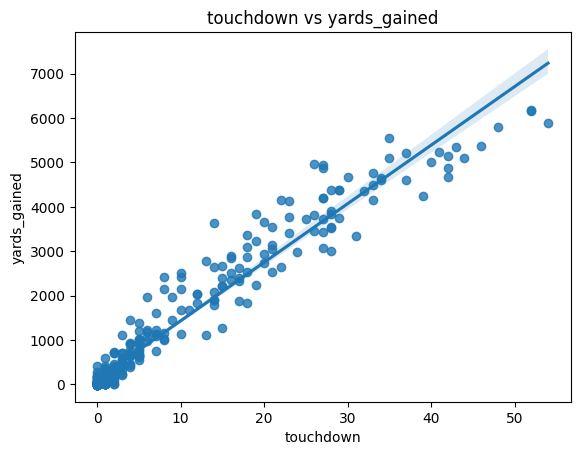

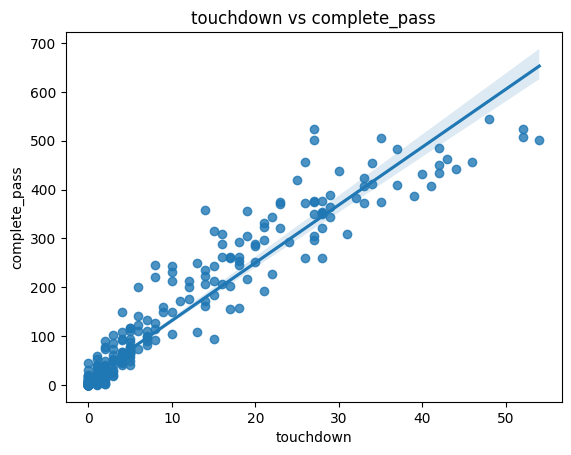

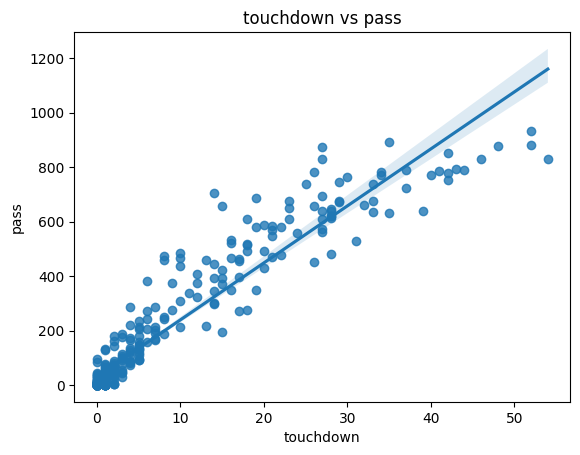

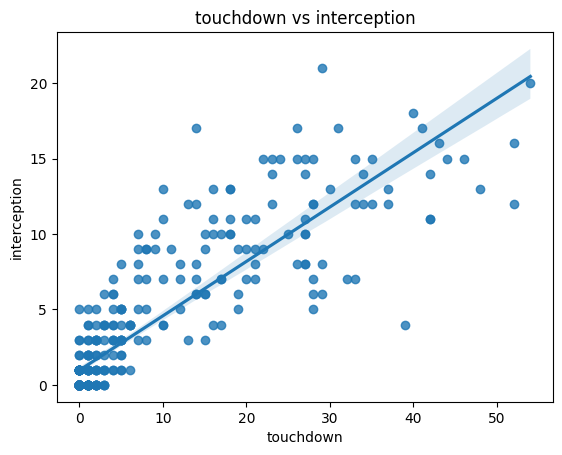

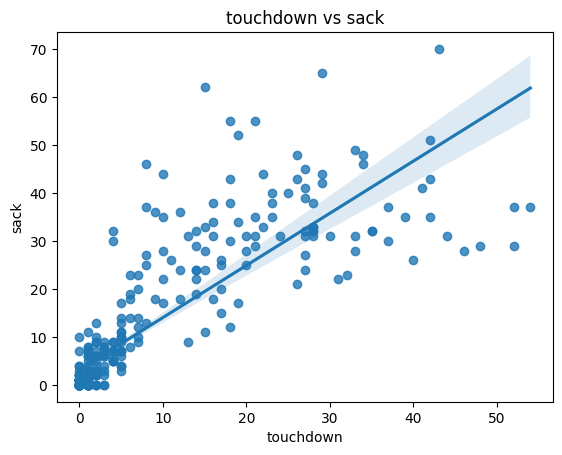

In [7]:
# See correlations with touchdowns
for y in["yards_gained", "complete_pass", "pass", "interception", "sack"]:
    sns.regplot(data=qb_df, x="touchdown", y=y)
    plt.title(f"touchdown vs {y}")
    plt.show()

In [8]:
# It seems that all correlate

# Create a new feature
_df = qb_df.copy()

# Add 1 to season
_df["season"] = _df["season"].add(1)

# Merge the dataframes
new_qb_df = (qb_df
             .merge(_df,
                    on=["season", "passer_id", "passer"],
                        suffixes=("", "_next"),
                        how="left"))

new_qb_df.sample(10)

,season,passer_id,passer,pass,complete_pass,interception,sack,yards_gained,touchdown,pass_next,complete_pass_next,interception_next,sack_next,yards_gained_next,touchdown_next
163,2022,00-0033077,D.Prescott,529,309.0,17.0,22.0,3346.0,31.0,753.0,433.0,11.0,35.0,4661.0,42.0
91,2021,00-0035156,J.Fox,3,2.0,0.0,0.0,38.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
210,2022,00-0036264,J.Love,20,14.0,0.0,0.0,195.0,1.0,73.0,36.0,3.0,3.0,421.0,2.0
282,2023,00-0033949,J.Dobbs,519,262.0,10.0,30.0,2530.0,18.0,78.0,40.0,2.0,6.0,408.0,3.0
249,2023,00-0029263,R.Wilson,562,297.0,8.0,45.0,3081.0,27.0,609.0,292.0,11.0,55.0,3374.0,18.0
140,2022,00-0029263,R.Wilson,609,292.0,11.0,55.0,3374.0,18.0,482.0,259.0,6.0,33.0,3016.0,28.0
48,2021,00-0032268,M.Mariota,2,1.0,0.0,0.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
8,2021,00-0026158,J.Flacco,45,27.0,0.0,2.0,326.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
124,2021,00-0037013,Z.Wilson,467,213.0,11.0,44.0,2148.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
16,2021,00-0027973,A.Dalton,277,149.0,9.0,18.0,1458.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN


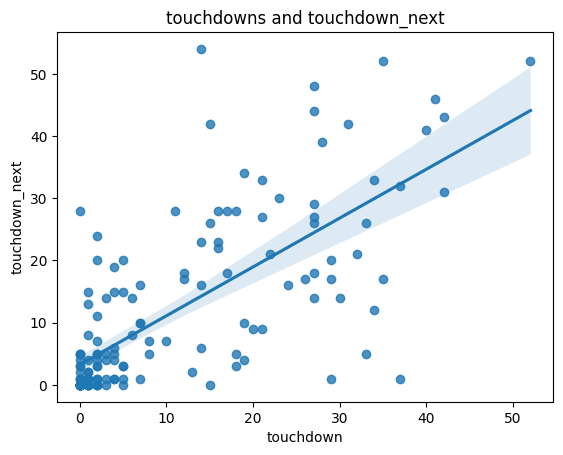

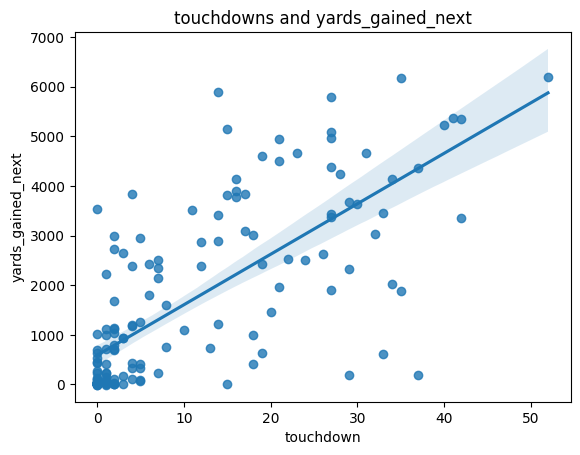

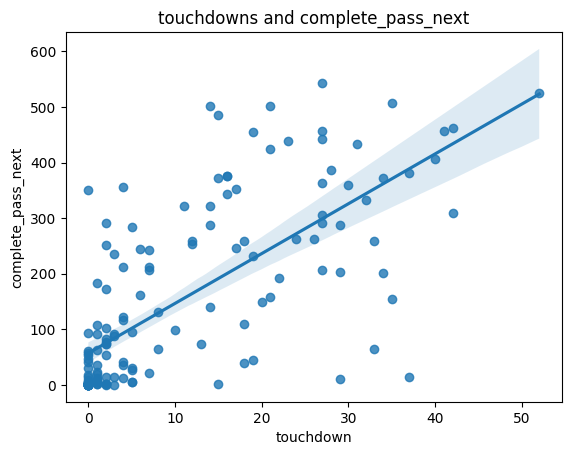

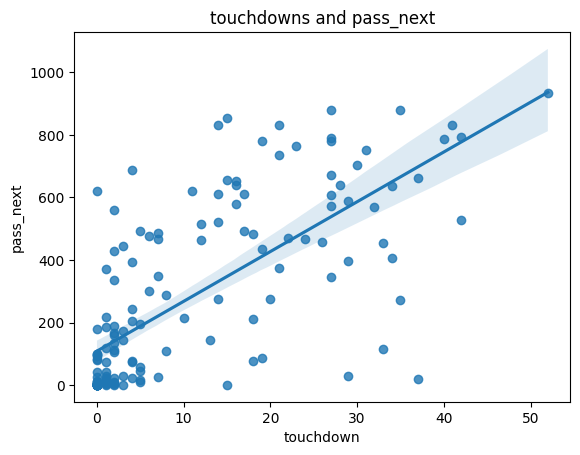

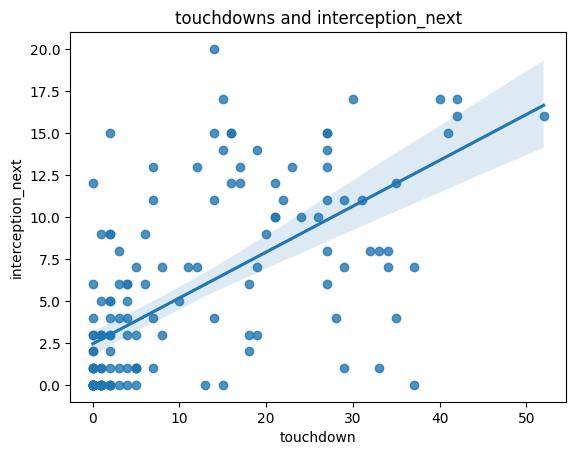

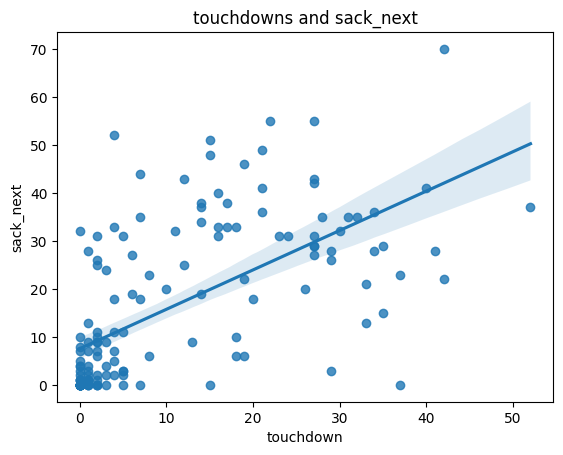

In [9]:
# Correlate with next season touchdowns
for y in ['touchdown_next','yards_gained_next', 'complete_pass_next', 'pass_next',  'interception_next','sack_next']:
  sns.regplot(data=new_qb_df, x='touchdown', y=y)
  plt.title(f"touchdowns and {y}")
  plt.show()

Machine learning

In [10]:
# Load in machine learning and stats packages
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

In [11]:
new_qb_df.sample(10)

,season,passer_id,passer,pass,complete_pass,interception,sack,yards_gained,touchdown,pass_next,complete_pass_next,interception_next,sack_next,yards_gained_next,touchdown_next
284,2023,00-0034177,T.Boyle,89,48.0,4.0,9.0,296.0,2.0,9.0,2.0,2.0,0.0,33.0,0.0
15,2021,00-0027948,B.Gabbert,14,7.0,0.0,1.0,57.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
296,2023,00-0034955,B.Rypien,46,18.0,1.0,2.0,173.0,0.0,99.0,53.0,4.0,8.0,442.0,3.0
248,2023,00-0028986,C.Keenum,68,34.0,3.0,6.0,231.0,2.0,7.0,2.0,0.0,0.0,8.0,0.0
291,2023,00-0034775,C.Kirk,2,1.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
266,2023,00-0032950,C.Wentz,35,17.0,1.0,2.0,162.0,2.0,337.0,172.0,9.0,26.0,1681.0,11.0
212,2022,00-0036322,J.Jefferson,4,3.0,0.0,0.0,40.0,0.0,4.0,2.0,0.0,0.0,35.0,0.0
299,2023,00-0035228,K.Murray,322,176.0,5.0,18.0,1843.0,12.0,465.0,259.0,7.0,25.0,2389.0,17.0
305,2023,00-0035700,J.Jacobs,1,0.0,0.0,1.0,-4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
174,2022,00-0033856,L.Fournette,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Use the previous season performance as our features for our model 
features = ['pass_next', 'complete_pass_next', 
            'interception_next', 'sack_next',
            'yards_gained_next', 'touchdown_next']

# Predicting "current" season touchdowns 
target = 'touchdown' 

# Make a subset of data that has no null values
model_data = (new_qb_df
              .dropna(subset=features+[target]))

# Train on 2022 data  
train_data = (model_data
              .loc[model_data['season']==2022])

# Test on 2023 data 
test_data = (model_data
             .loc[model_data['season']==2023])

# Linear regression
model = LinearRegression()

# Train the model on the training data
model.fit(train_data.loc[:, features], 
          train_data[target])

# Predict on the test data 
preds = model.predict(test_data.loc[:, features])

preds = pd.Series(preds, index=test_data.index)

# Join predictions back to test dataset
test_data['preds'] = preds

In [13]:
# Run some basic statistics to examine the quality of the prediction

rmse = mean_squared_error(test_data['touchdown'], test_data['preds'])**0.5
r2 = pearsonr(test_data['touchdown'], test_data['preds'])[0]**2
print(f"rmse: {rmse}\nr2: {r2}")

rmse: 11.033586201462972
r2: 0.3127821203339658


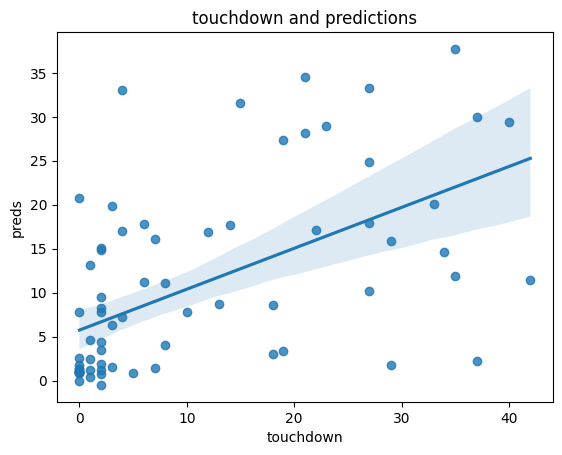

In [14]:
# Visualize the outputs 
sns.regplot(data=test_data, x='touchdown', y='preds')
plt.title('touchdown and predictions')
plt.show()

In [19]:
test_data.loc[:, ['season', 'passer_id', 'passer', 'touchdown', 'preds']].sort_values('touchdown', ascending=False).sample(10)

,season,passer_id,passer,touchdown,preds
278,2023,00-0033869,M.Trubisky,4.0,7.287724
249,2023,00-0029263,R.Wilson,27.0,24.854828
248,2023,00-0028986,C.Keenum,2.0,1.184908
311,2023,00-0036212,T.Tagovailoa,33.0,20.064001
303,2023,00-0035289,G.Minshew II,19.0,3.422287
264,2023,00-0032436,J.Driskel,2.0,1.942004
240,2023,00-0026158,J.Flacco,18.0,8.604860
315,2023,00-0036322,J.Jefferson,0.0,1.170399
258,2023,00-0031345,J.Garoppolo,7.0,16.157627
295,2023,00-0034869,S.Darnold,2.0,8.239229
